In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### dataset customer

In [2]:
df_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [3]:
df_customer['Marital Status'].unique()

array(['Married', nan, 'Single'], dtype=object)

Mariital Status has 3 missing value

In [4]:
# Check data duplicate
df_customer.duplicated().sum()

0

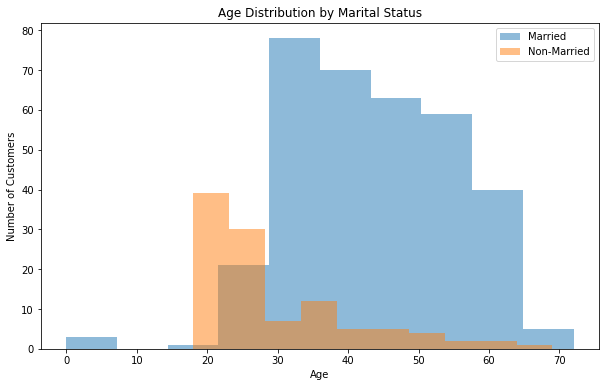

In [5]:
# Creating histograms for age distribution based on marital status
plt.figure(figsize=(10, 6))

# Married
married_age = df_customer[df_customer['Marital Status'] == 'Married']['Age']
plt.hist(married_age, bins=10, alpha=0.5, label='Married')

# Non-Married
non_married_age = df_customer[df_customer['Marital Status'] != 'Married']['Age']
plt.hist(non_married_age, bins=10, alpha=0.5, label='Non-Married')

plt.title('Age Distribution by Marital Status')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [6]:
df_customer[df_customer["Marital Status"].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


because the age for missing value in marital status is 27 - 34 so will fill with mode.

In [7]:
# fill missing value with mode
df_customer.loc[df_customer["Marital Status"].isnull(),"Marital Status"] = df_customer["Marital Status"].mode()[0]

### dataset product

In [8]:
df_product = pd.read_csv('Case Study - Product.csv', delimiter=';')

In [9]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### Dataset Store

In [11]:
df_store = pd.read_csv('Case Study - Store.csv', delimiter=';')

In [18]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [13]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [17]:
# change latitude and longitude data type
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype(float)
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype(float)

In [19]:
#check duplicated data
df_store.duplicated().sum()

0

### Dataset Transaction

In [30]:
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [31]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [32]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [33]:
# Convert the "Date" column to datetime data type with the specified format
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [34]:
df_transaction.TransactionID.value_counts()

TransactionID
TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: count, Length: 4908, dtype: int64

There are duplicate transaction IDs. 

Check if the same transaction ID is held by the same customer and they shopped on the same day but for different products.

In [43]:
df_transaction[df_transaction.TransactionID == "TR71313"]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


It has been found that the same transaction ID is associated with different customers and different purchase dates. 

Therefore, only the latest data will be retained to avoid duplicate transaction IDs.

In [36]:
# Grouping based on TransactionID, selecting the last row within each group,
# then combining the results to obtain a new DataFrame
new_df_transaction = df_transaction.groupby('TransactionID').last().reset_index()

In [44]:
new_df_transaction[new_df_transaction.TransactionID == "TR71313"]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3309,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [45]:
new_df_transaction.TransactionID.duplicated().sum()

0

There is no duplicated data and missing value.

### Merged all data

In [48]:
# merged all data
df_merged= pd.merge(new_df_transaction, df_product, on='ProductID', how='left')
df_merged = pd.merge(df_merged, df_store, on='StoreID', how='inner')
df_merged= pd.merge(df_merged, df_customer,on='CustomerID',how='inner')

In [49]:
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,Oat,16000,Gita Ginara,Gita,General Trade,-6.966667,110.416664,37,0,Married,"5,35"
1,TR32057,235,2022-06-10,P7,9400,3,28200,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3.316694,114.590111,37,0,Married,"5,35"
2,TR47938,235,2022-10-18,P3,7500,4,30000,7,Crackers,7500,Buana Indah,Buana,General Trade,3.316694,114.590111,37,0,Married,"5,35"
3,TR49065,235,2022-10-08,P5,4200,4,16800,7,Thai Tea,4200,Buana Indah,Buana,General Trade,3.316694,114.590111,37,0,Married,"5,35"
4,TR50919,235,2022-08-18,P7,9400,4,37600,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3.316694,114.590111,37,0,Married,"5,35"


In [50]:
# rearrange column
column_order = [
    'TransactionID', 'CustomerID','Age','Gender','Marital Status','Income',
    'Date', 'ProductID', 'Product Name', 'Price_x', 'Qty','TotalAmount', 
    'StoreID','StoreName','GroupStore', 'Type', 'Latitude', 'Longitude'
]
df_merged = df_merged[column_order]

In [51]:
df_merged.head()

,TransactionID,CustomerID,Age,Gender,Marital Status,Income,Date,ProductID,Product Name,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,37,0,Married,"5,35",2022-05-21,P8,Oat,16000,2,32000,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR32057,235,37,0,Married,"5,35",2022-06-10,P7,Coffee Candy,9400,3,28200,7,Buana Indah,Buana,General Trade,3.316694,114.590111
2,TR47938,235,37,0,Married,"5,35",2022-10-18,P3,Crackers,7500,4,30000,7,Buana Indah,Buana,General Trade,3.316694,114.590111
3,TR49065,235,37,0,Married,"5,35",2022-10-08,P5,Thai Tea,4200,4,16800,7,Buana Indah,Buana,General Trade,3.316694,114.590111
4,TR50919,235,37,0,Married,"5,35",2022-08-18,P7,Coffee Candy,9400,4,37600,7,Buana Indah,Buana,General Trade,3.316694,114.590111


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4908 non-null   object        
 1   CustomerID      4908 non-null   int64         
 2   Age             4908 non-null   int64         
 3   Gender          4908 non-null   int64         
 4   Marital Status  4908 non-null   object        
 5   Income          4908 non-null   object        
 6   Date            4908 non-null   datetime64[ns]
 7   ProductID       4908 non-null   object        
 8   Product Name    4908 non-null   object        
 9   Price_x         4908 non-null   int64         
 10  Qty             4908 non-null   int64         
 11  TotalAmount     4908 non-null   int64         
 12  StoreID         4908 non-null   int64         
 13  StoreName       4908 non-null   object        
 14  GroupStore      4908 non-null   object        
 15  Type

In [55]:
df_merged.duplicated().sum()

0

In [56]:
# save data
df_merged.to_csv('df_merged.csv', index=False)